<a href="https://colab.research.google.com/github/YunilaPutmasari/Machine_Learning-2024/blob/main/ML_Tugas2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Persiapan Data

penjelasan :

Tujuan: Mengimpor pustaka yang diperlukan untuk analisis data.
1. numpy: untuk operasi matematis dan manipulasi array.
2. pandas: untuk manipulasi dan analisis data, terutama dengan DataFrame.
3. matplotlib dan seaborn: untuk visualisasi data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


2. Baca Data

Tujuan: Membaca data dari file CSV ke dalam DataFrame pandas. Data ini akan digunakan untuk analisis.

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Mechine Learning/insurance.csv')


3. Pemahaman Terhadap Data

Tujuan: Memahami struktur dan isi dari dataset.
1. head(): Menampilkan beberapa baris pertama dari data untuk melihat format dan konten.
2. shape: Menampilkan ukuran dataset (jumlah baris dan kolom).
3. info(): Menyediakan informasi tentang kolom dan tipe data.
4. describe(): Memberikan statistik deskriptif untuk kolom numerik, termasuk rata-rata, median, dll.

In [3]:
print(data.head())
print(data.shape)
print(data.info())
print(data.describe())


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
(1338, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  13

4. Visualisasi Data

Kode ini digunakan untuk membuat scatter plot yang menunjukkan hubungan antara variabel independen dan dependen dari dataset

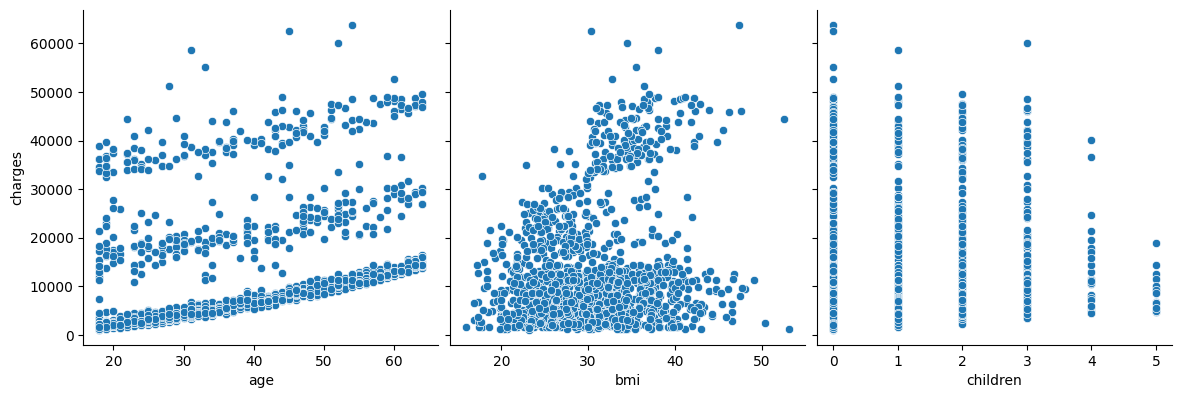

In [17]:
# Scatter plot untuk beberapa variabel
sns.pairplot(data, x_vars=['age', 'bmi', 'children'], y_vars='charges', height=4, aspect=1, kind='scatter')
plt.show()

Kode ini digunakan untuk membuat visualisasi heatmap yang menunjukkan korelasi antara variabel numerik dalam dataset

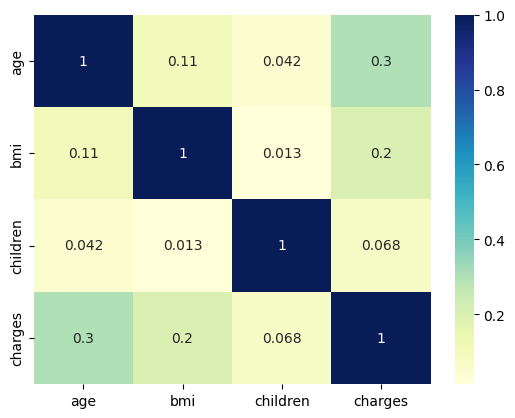

In [18]:
# Visualisasi korelasi antara variabel
# Select only numeric columns from the DataFrame
numeric_data = data.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_data.corr(), annot=True, cmap="YlGnBu")
plt.show()


5. Regresi Linier

Tujuan: Menentukan variabel bebas (X) dan variabel target (y).

get_dummies(): Mengubah variabel kategorikal menjadi format numerik yang dapat digunakan dalam model regresi.

In [6]:
X = data[['age', 'bmi', 'children', 'smoker', 'sex']]
X = pd.get_dummies(X, drop_first=True)  # Mengonversi variabel kategorikal menjadi dummy
y = data['charges']


6. Pembagian Data Latih dan Uji

Tujuan: Membagi dataset menjadi data latih dan data uji untuk mengevaluasi model.

train_test_split(): Membagi data menjadi 70% untuk pelatihan dan 30% untuk pengujian.

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)


7. Training Model Regresi Linier

Tujuan: Membuat dan melatih model regresi linier.
1. LinearRegression(): Membuat instansi model regresi linier.
2. fit(): Melatih model menggunakan data latih.
3. predict(): Menghasilkan prediksi untuk data uji.

In [8]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)


8. Evaluasi Model Regresi Linier

Tujuan: Mengevaluasi kinerja model regresi linier.
1. r2_score: Menghitung R-squared untuk mengukur seberapa baik model menjelaskan variasi data.
2. mean_absolute_error: Mengukur rata-rata kesalahan absolut.
3. mean_squared_error: Mengukur rata-rata kesalahan kuadrat.

In [9]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)

print(f"R-squared: {r2_lr}")
print(f"MAE: {mae_lr}")
print(f"MSE: {mse_lr}")


R-squared: 0.780095696440481
MAE: 3896.078705469495
MSE: 31929596.87338222


9. Visualisasi Hasil Regresi Linier

Tujuan: Memvisualisasikan hasil prediksi dari model regresi linier.

Scatter plot: Menampilkan nilai aktual vs. nilai prediksi untuk melihat sejauh mana model memprediksi dengan benar.

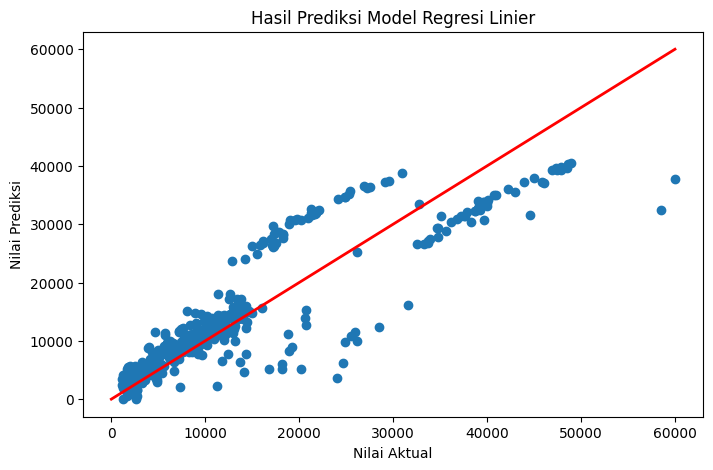

In [10]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_lr)
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Hasil Prediksi Model Regresi Linier')
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linewidth=2)  # Garis y=x
plt.show()


10. Support Vector Regression (SVR)

Tujuan: Menerapkan scaling pada fitur untuk SVR.
1. StandardScaler(): Menghitung rata-rata dan standar deviasi untuk menstandarkan data.
2. fit_transform(): Menerapkan scaling pada data pelatihan.

In [11]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))


11. Fitting SVR ke Dataset

Tujuan: Membuat dan melatih model SVR.
1. SVR(): Membuat model SVR dengan kernel Radial Basis Function (RBF).
2. fit(): Melatih model dengan data yang telah diskalakan.

In [13]:
from sklearn.svm import SVR

model_svr = SVR(kernel='rbf')
model_svr.fit(X_train_scaled, y_train_scaled.ravel())


SVR()

12. Prediksi dengan SVR

Tujuan: Menghasilkan prediksi menggunakan model SVR.
1. transform(): Menerapkan scaling pada data uji.
2. inverse_transform(): Mengembalikan prediksi ke skala asli.


In [14]:
X_test_scaled = scaler_X.transform(X_test)
y_pred_svr_scaled = model_svr.predict(X_test_scaled)

y_pred_svr = scaler_y.inverse_transform(y_pred_svr_scaled.reshape(-1, 1))


13. Evaluasi Model SVR

Tujuan: Mengevaluasi kinerja model SVR dengan metrik yang sama.

In [15]:
r2_svr = r2_score(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)

print(f"R-squared SVR: {r2_svr}")
print(f"MAE SVR: {mae_svr}")
print(f"MSE SVR: {mse_svr}")


R-squared SVR: 0.8815007974227521
MAE SVR: 2286.122833297351
MSE SVR: 17205810.46784611


14. Visualisasi Hasil SVR

Tujuan: Memvisualisasikan hasil prediksi dari model SVR, sama seperti yang dilakukan untuk regresi linier.

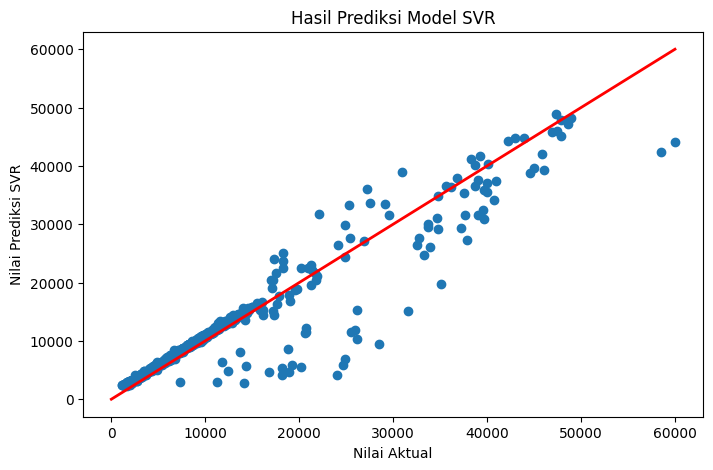

In [16]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_svr)
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi SVR')
plt.title('Hasil Prediksi Model SVR')
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linewidth=2)  # Garis y=x
plt.show()


Berikut adalah penjelasan singkat mengenai hasil evaluasi model regresi linier dan Support Vector Regression (SVR) berdasarkan metrik yang Anda berikan:

### Hasil Regresi Linier
1. **R-squared (0.7801)**:
   - **Fungsi**: Mengukur proporsi variasi dalam variabel target (charges) yang dapat dijelaskan oleh model.
   - **Tujuan**: Nilai mendekati 1 menunjukkan model yang baik. Di sini, sekitar 78% variasi dalam biaya medis dapat dijelaskan oleh fitur-fitur yang digunakan.

2. **MAE (Mean Absolute Error) (3896.08)**:
   - **Fungsi**: Mengukur rata-rata kesalahan absolut antara nilai aktual dan prediksi.
   - **Tujuan**: Nilai ini menunjukkan bahwa rata-rata kesalahan prediksi biaya medis adalah sekitar 3896.08. Semakin kecil nilai MAE, semakin baik model dalam melakukan prediksi.

3. **MSE (Mean Squared Error) (31929596.87)**:
   - **Fungsi**: Mengukur rata-rata kesalahan kuadrat antara nilai aktual dan prediksi.
   - **Tujuan**: Ini menunjukkan bahwa kesalahan kuadrat rata-rata adalah sekitar 31929596.87. Nilai MSE yang lebih kecil berarti model lebih baik, tetapi nilai ini lebih peka terhadap outlier dibandingkan MAE.

### Hasil Support Vector Regression (SVR)
1. **R-squared (0.8815)**:
   - **Fungsi**: Sama dengan regresi linier, ini mengukur proporsi variasi dalam biaya medis yang dapat dijelaskan oleh model SVR.
   - **Tujuan**: Dengan nilai 88%, SVR menjelaskan lebih banyak variasi dibandingkan regresi linier, menunjukkan model yang lebih baik.

2. **MAE (2286.12)**:
   - **Fungsi**: Sama seperti pada regresi linier, mengukur rata-rata kesalahan absolut.
   - **Tujuan**: Rata-rata kesalahan prediksi dengan SVR jauh lebih kecil (2286.12) dibandingkan dengan regresi linier, menunjukkan bahwa SVR lebih akurat dalam memprediksi biaya medis.

3. **MSE (17205810.47)**:
   - **Fungsi**: Sama dengan regresi linier, mengukur rata-rata kesalahan kuadrat.
   - **Tujuan**: MSE untuk SVR juga lebih kecil daripada untuk regresi linier, menunjukkan bahwa SVR memiliki performa yang lebih baik dalam hal kesalahan kuadrat.

### Kesimpulan
- **Perbandingan**: Model SVR menunjukkan performa yang lebih baik dibandingkan dengan model regresi linier dalam semua metrik evaluasi yang diberikan (R-squared, MAE, MSE).
- **Implicasi**: Hal ini berarti SVR lebih efektif dalam memprediksi biaya medis berdasarkan variabel yang ada, dan dapat memberikan prediksi yang lebih tepat dan akurat.

Dari analisis ini, jika Anda memilih model untuk digunakan, SVR adalah pilihan yang lebih baik berdasarkan hasil evaluasi ini.